Abdullah has enlisted your expertise in data analysis to delve into the promotion patterns. By uncovering these insights, he aims to identify key features that could serve as criteria for recommending promotion eligibility.


==============================================================================================================
The dataset contains these variables as explained below:
• EmployeeNo : System-generated unique staff ID

• Division: Operational department where each employee works

• Qualification: Highest qualification received by the staff

• Gender: Male or Female

• ChannelofRecruitment: How the staff was recruited – this is via internal process, use of an agent or special referral

• Trainings_Attended : Unique paid and unpaid trainings attended by each staff in the previous business cycle

• Yearofbirth: Year that the employee was born

• LastPerformanceScore Previous year overall performance HR score and rated on a scale of 0-14

• Yearofrecruitment : The year that each staff was recruited into the company

• Targets_met: A measure of employees who meet the annual set target. If met, the staff scores 1 but if not, it is a 0.

• Previous_Award : An indicator of previous award won. If yes, it is a 1 and if No it is a 0.

• Trainingscoreaverage: Feedback score on training attended based on evaluation

• StateOfOrigin: The state that the employee claims

• Foreign_schooled: An indicator of staff who had any of their post-secondary education outside the country. Responses are in Yes or No

• Marital_Status: Marriage status of employees and recorded as Yes or No

• PastDisciplinaryAction : An indicator if a staff has been summoned to a disciplinary panel in the past. This is indicated as Yes or No

• PreviousIntraDepartmentalMovement : This is an indicator to identify staff who have moved between departments in the past. Yes and No are the responses.

• Noofprevious_employers : A list of the number of companies that an employee worked with before joining the organisation. This is recorded as counts



importing our libraries

In [1]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

Now that our project is ready, we need to loan our dataset, lets Go.....

In [2]:
promotionData = pd.read_csv('/content/promotion_dataset.csv')
promotionData

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,MSc MBA and PhD,Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,YAK/S/54802,Information Technology and Solution Support,First Degree or HND,Female,Direct Internal process,2,1990,0.0,2018,0,0,70,LAGOS,Yes,Married,No,No,0,0
38308,YAK/S/54805,Customer Support and Field Operations,MSc MBA and PhD,Female,Agency and others,2,1984,5.0,2013,0,0,48,IMO,Yes,Married,No,No,1,0
38309,YAK/S/54806,Information and Strategy,First Degree or HND,Male,Agency and others,2,1994,12.5,2016,1,0,71,ANAMBRA,No,Married,No,No,3,0
38310,YAK/S/54807,Commercial Sales and Marketing,NaN,Male,Direct Internal process,2,1992,2.5,2017,0,0,37,KWARA,Yes,Married,No,No,1,0


In [7]:
promotionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [8]:
promotionData['Qualification'].value_counts()


Qualification
First Degree or HND         25578
MSc  MBA and PhD            10469
Non University Education      586
Name: count, dtype: int64

In [9]:
promotionData.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [10]:
#filling with the mode
promotionData['Qualification'] = promotionData['Qualification'].fillna(promotionData['Qualification'].mode()[0])


In [11]:
promotionData.isnull().sum()

EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
State_Of_Origin                        0
Foreign_schooled                       0
Marital_Status                         0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
dtype: int64

In [12]:
#converting Foreign_schooled,Past_Disciplinary_Action and Previous_IntraDepartmental_Movement
#object data type to a boolean data type
promotionData['Foreign_schooled'] = promotionData['Foreign_schooled'].astype(bool)
promotionData['Past_Disciplinary_Action'] = promotionData['Past_Disciplinary_Action'].astype(bool)
promotionData['Previous_IntraDepartmental_Movement'] = promotionData['Previous_IntraDepartmental_Movement'].astype(bool)

In [13]:
promotionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        38312 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

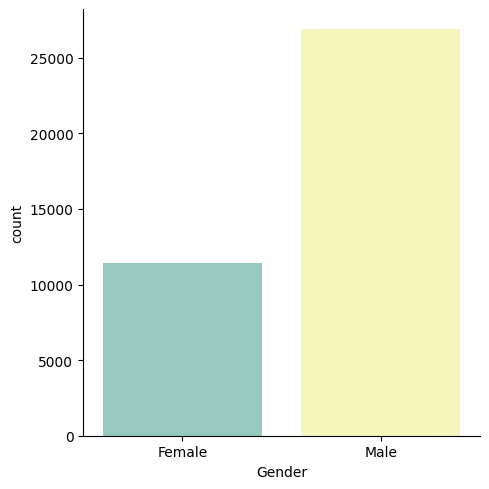

In [14]:
sns.catplot(x="Gender", kind="count", palette="Set3", hue='Gender', data=promotionData)

 The Yakubu trading group has a greater number of male employees than female employees, with over 25,000 staff being male

In [ ]:
# we need to get the age of the staffs
year_now = pd.Timestamp.now().year
promotionData['Age'] = year_now - promotionData['Year_of_birth']
promotionData

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age
0,YAK/S/00001,Commercial Sales and Marketing,MSc MBA and PhD,Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0,38
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0,33
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0,37
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0,42
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,YAK/S/54802,Information Technology and Solution Support,First Degree or HND,Female,Direct Internal process,2,1990,0.0,2018,0,0,70,LAGOS,Yes,Married,No,No,0,0,34
38308,YAK/S/54805,Customer Support and Field Operations,MSc MBA and PhD,Female,Agency and others,2,1984,5.0,2013,0,0,48,IMO,Yes,Married,No,No,1,0,40
38309,YAK/S/54806,Information and Strategy,First Degree or HND,Male,Agency and others,2,1994,12.5,2016,1,0,71,ANAMBRA,No,Married,No,No,3,0,30
38310,YAK/S/54807,Commercial Sales and Marketing,NaN,Male,Direct Internal process,2,1992,2.5,2017,0,0,37,KWARA,Yes,Married,No,No,1,0,32


In [ ]:
promotionData.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,No_of_previous_employers,Promoted_or_Not,Age
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,1.040953,0.084595,37.790666
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,1.235738,0.278282,7.646047
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000,0.000000,23.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000,0.000000,32.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,1.000000,0.000000,36.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,1.000000,0.000000,42.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,6.000000,1.000000,74.000000


<Axes: xlabel='Age', ylabel='Count'>

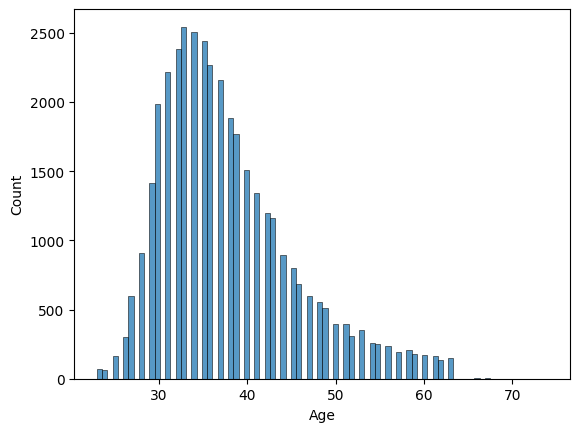

In [ ]:
sns.histplot(data=promotionData, x="Age")

Based on my findings, the majority of employees at the Yakubu trading group fall within the age range of 30 to 40 years, with the oldest employee being 74 years old.

<Axes: xlabel='count', ylabel='Qualification'>

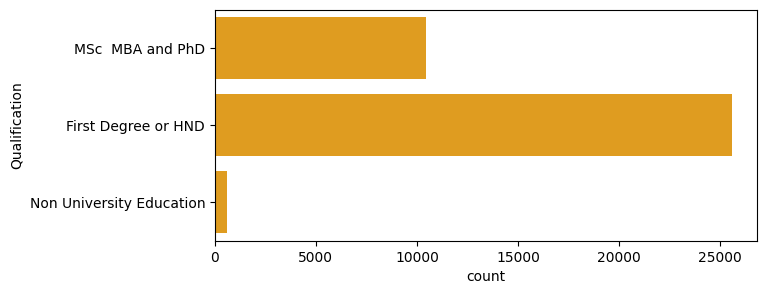

In [ ]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Qualification", data=promotionData, color="orange")

 More than 25,000 of the staff members hold either a first degree or an HND, while approximately 10,000 staff members hold higher qualifications such as MSc, MBA, or PhD.

<ipython-input-30-8081da64d907>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qualification', y='Age', data=avg_age_by_qualification, palette='viridis')


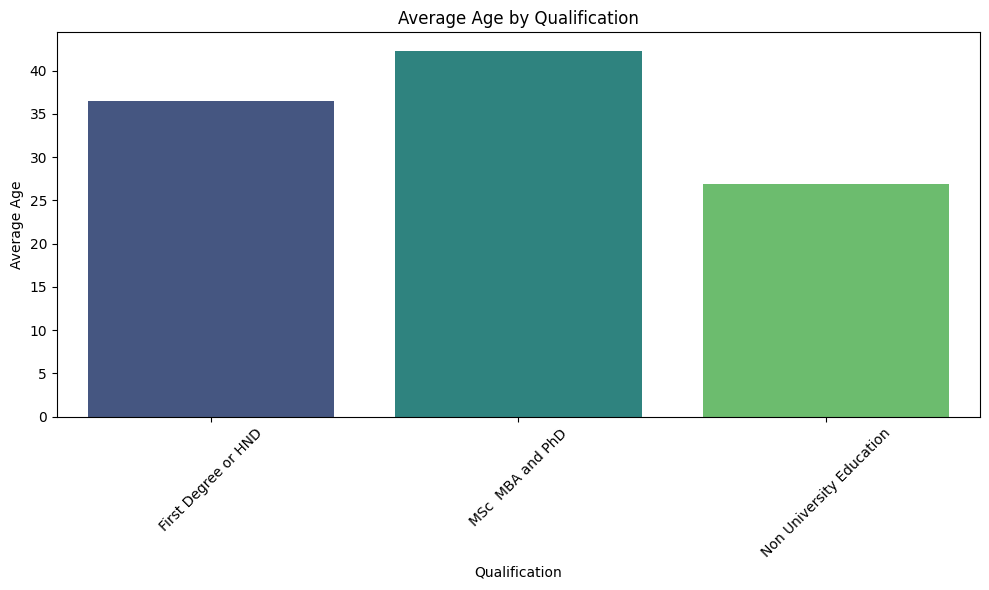

In [ ]:
avg_age_by_qualification = promotionData.groupby('Qualification')['Age'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Qualification', y='Age', data=avg_age_by_qualification, palette='viridis')
plt.title('Average Age by Qualification')
plt.xlabel('Qualification')
plt.ylabel('Average Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

I also examined the relationship between employees' qualifications and their ages. On average, employees with second degrees and above are 38 years old, while those with only first degrees are below 37 years old.

<ipython-input-31-98cc2e67c2a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel_of_Recruitment', data=promotionData, palette='Set2')


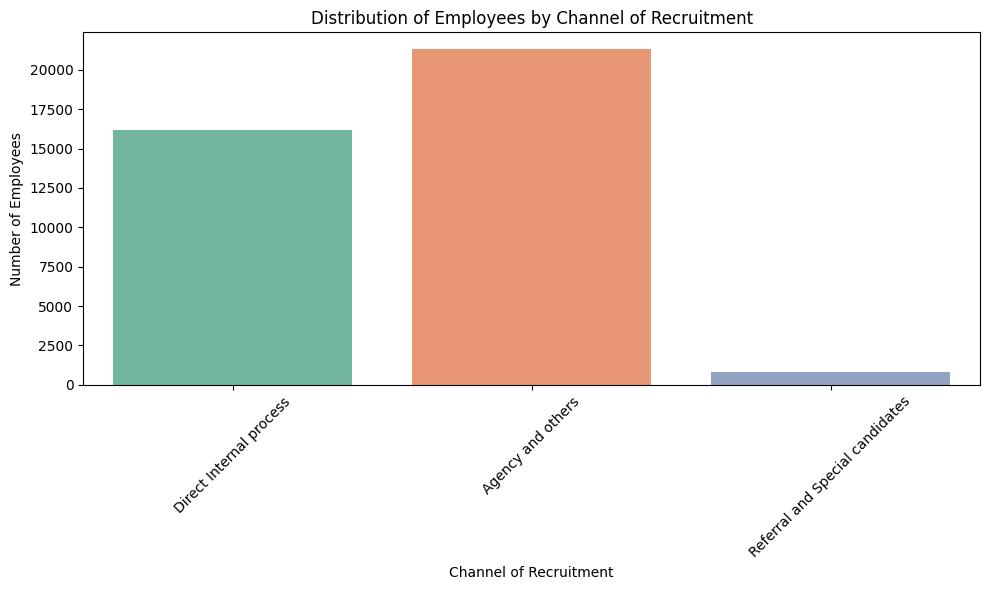

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Channel_of_Recruitment', data=promotionData, palette='Set2')
plt.title('Distribution of Employees by Channel of Recruitment')
plt.xlabel('Channel of Recruitment')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Over 20,000 staff members were recruited through a third-party agency, while a mere 1,000 were brought in via referrals and special candidate programs. Additionally, 15,500 employees were hired through direct internal processes

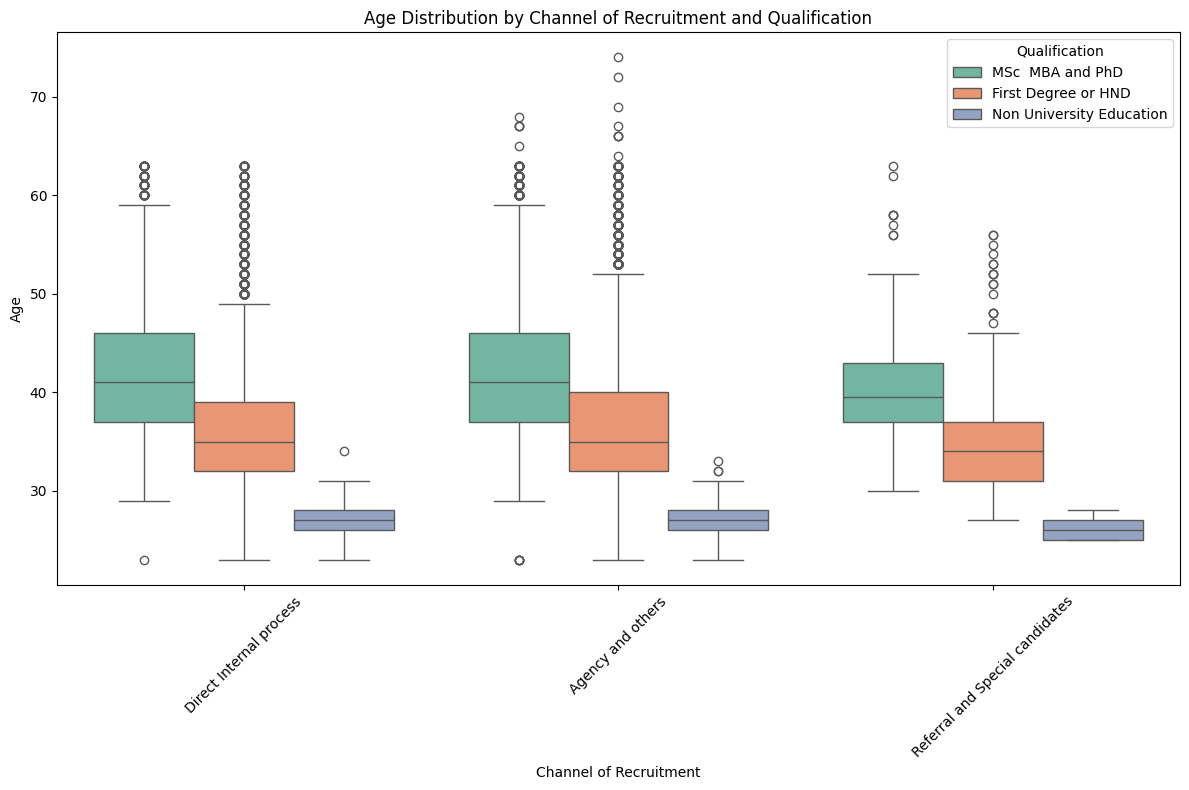

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Channel_of_Recruitment', y='Age', hue='Qualification', data=promotionData, palette='Set2')
plt.title('Age Distribution by Channel of Recruitment and Qualification')
plt.xlabel('Channel of Recruitment')
plt.ylabel('Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Qualification')
plt.tight_layout()
plt.show()

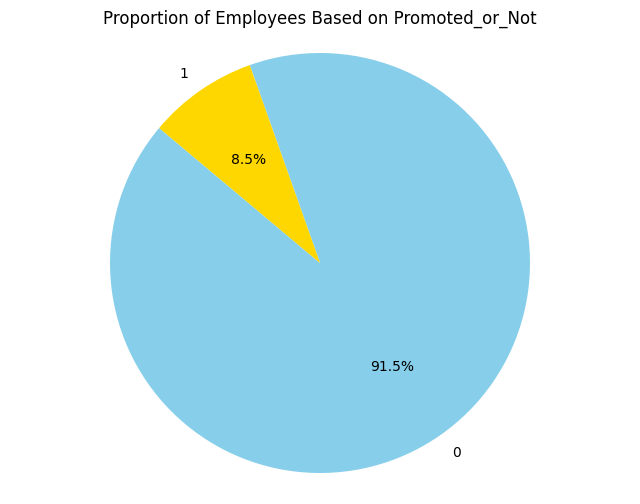

In [ ]:
targets_met_count = promotionData['Promoted_or_Not'].value_counts()
colors = ['skyblue', 'gold']
plt.figure(figsize=(8, 6))
plt.pie(targets_met_count, labels=targets_met_count.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Proportion of Employees Based on Promoted_or_Not')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart illustrates the distribution of employees who have been promoted versus those who haven't within the Yakubu Trading Group. A staggering 91.5% of staff members have not been promoted, while a mere 8.5% have received promotions

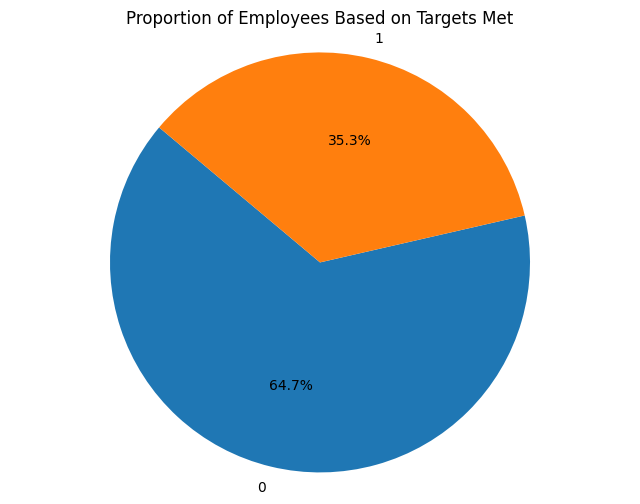

In [ ]:
# Counting the number of employees based on whether they met their targets or not
targets_met_count = promotionData['Targets_met'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(targets_met_count, labels=targets_met_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees Based on Targets Met')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart depicts the proportion of employees within the Yakubu Trading Group who have met their targets versus those who have not. Specifically, 64.7% of staff members did not meet their targets, while 35.3% successfully achieved their targets

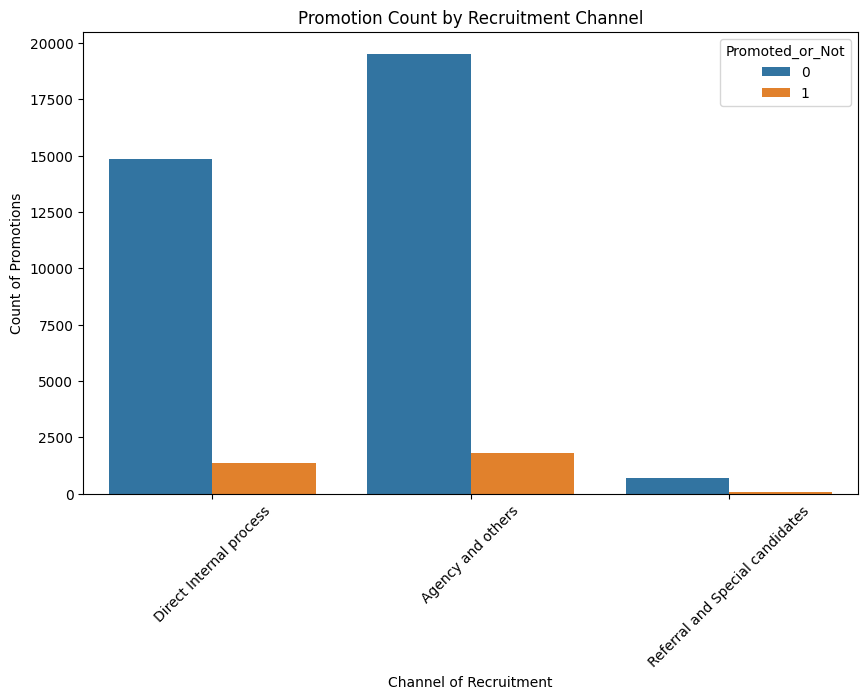

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Channel_of_Recruitment', hue='Promoted_or_Not', data=promotionData)
plt.title('Promotion Count by Recruitment Channel')
plt.xlabel('Channel of Recruitment')
plt.ylabel('Count of Promotions')
plt.xticks(rotation=45)
plt.show()

The employees who entered through Agency and other channels had the highest number of staff members who were promoted, followed by those who came in through the Direct Internal Process. In contrast, referral and special candidates had the lowest number of promoted staff members

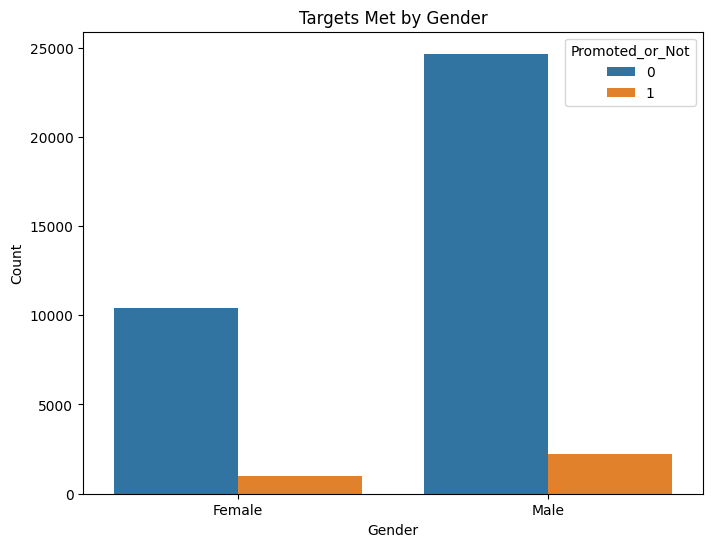

In [ ]:
 # Plotting count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Promoted_or_Not', data=promotionData)
plt.title('Targets Met by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The gender-based classification reveals that a higher proportion of male employees met their targets compared to female employees

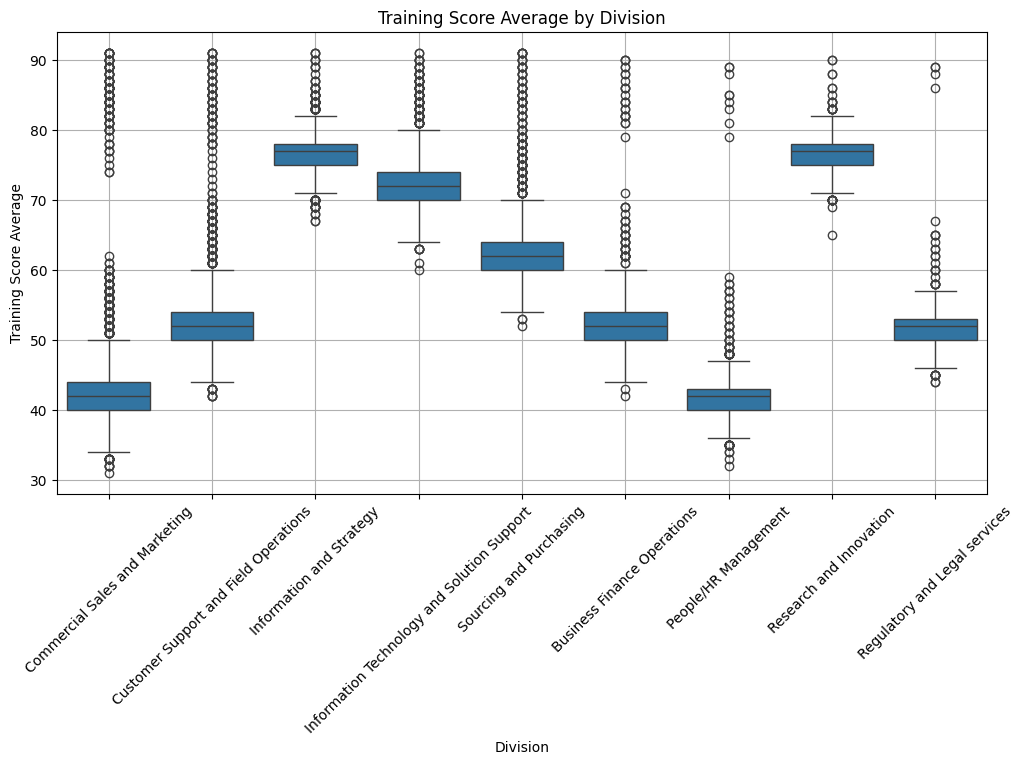

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Division', y='Training_score_average', data=promotionData)
plt.title('Training Score Average by Division')
plt.xlabel('Division')
plt.ylabel('Training Score Average')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

The division-wise analysis of training scores indicates that Information and Strategy received the highest score, followed by Commercial Sales and Marketing and Business Finance Operations, both scoring 52

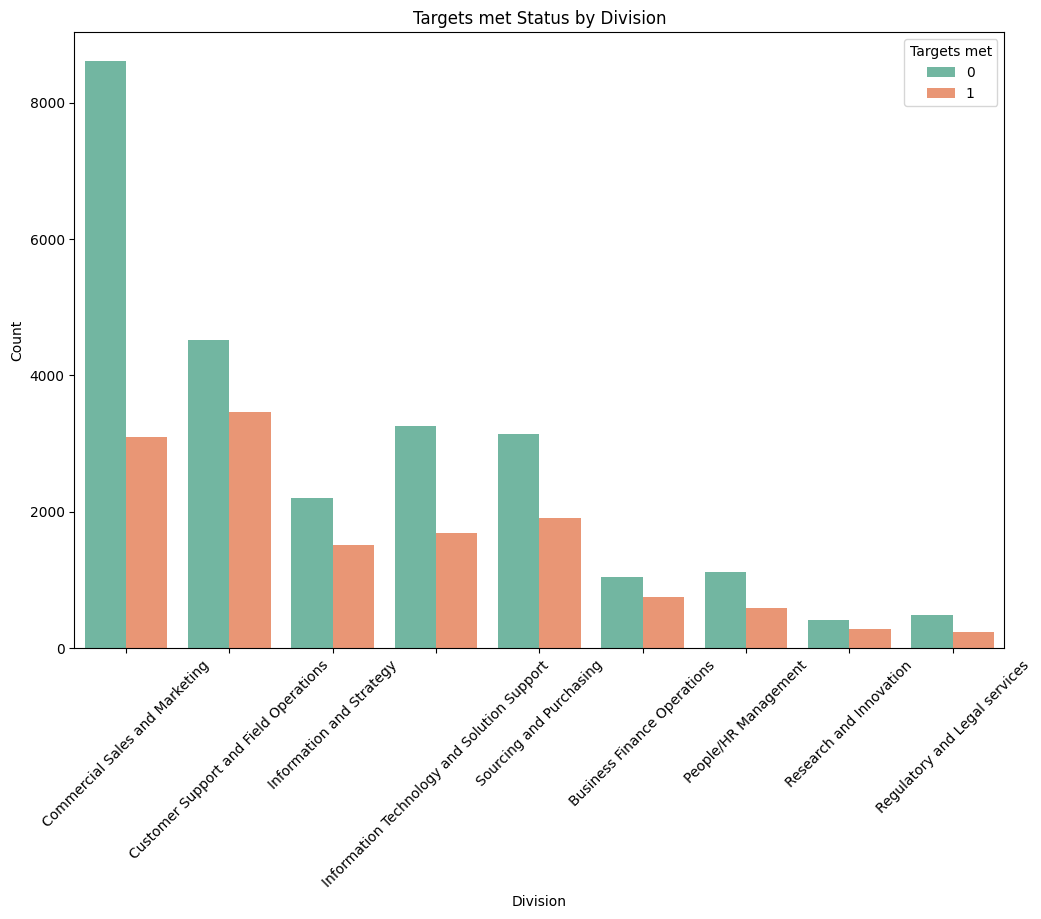

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Division', hue='Targets_met', data=promotionData, palette='Set2')
plt.title('Targets met Status by Division')
plt.xlabel('Division')
plt.ylabel('Count')
plt.legend(title='Targets met', labels=['0', '1'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The chart illustrates the division-wise breakdown of target achievement, with orange bars indicating targets met and green bars representing targets not met. Customer Support and Field Operations exhibit the highest number of staff members who met their targets, followed by Commercial Sales and Marketing. Conversely, People/HR Management, Research and Innovation, and Regulatory and Legal Services are at the bottom of the chart in terms of target achievement

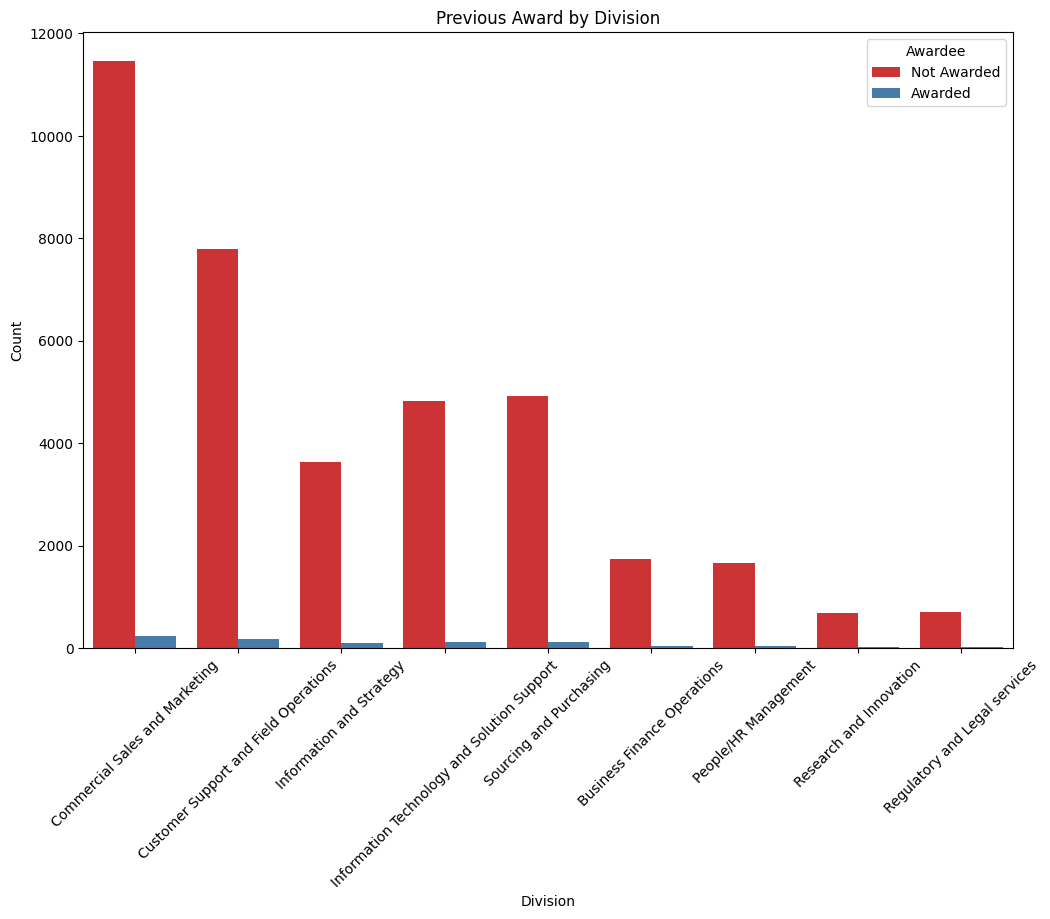

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Division', hue='Previous_Award', data=promotionData, palette='Set1')
plt.title('Previous Award by Division')
plt.xlabel('Division')
plt.ylabel('Count')
plt.legend(title='Awardee', labels=['Not Awarded','Awarded'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

 The Previous Award feature is a significant factor that Yakubu Trading Group employs in promoting their staff, which is why it closely resembles the promotion chart below

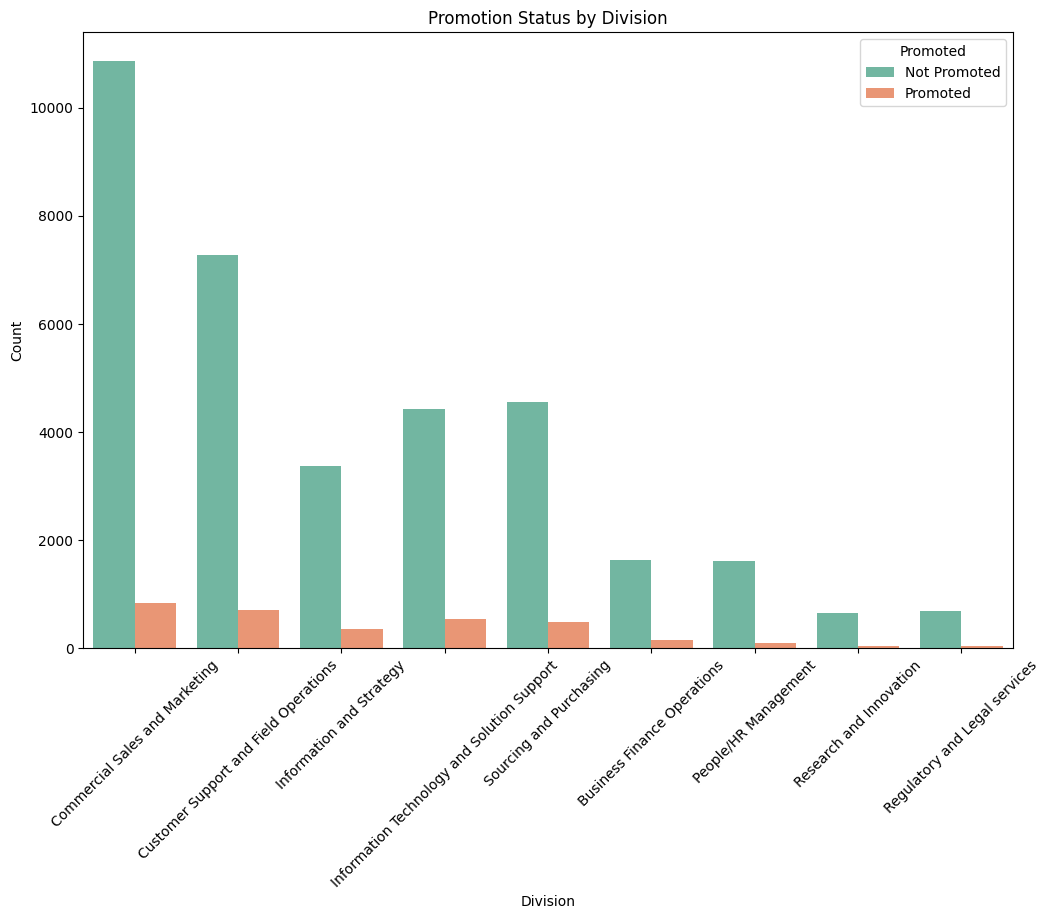

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Division', hue='Promoted_or_Not', data=promotionData, palette='Set2')
plt.title('Promotion Status by Division')
plt.xlabel('Division')
plt.ylabel('Count')
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The chart depicts the staff of Yakubu Trading Group who were promoted across various divisions. Commercial Sales and Marketing, along with Customer Support and Field Operations, lead the chart for divisions with the most staff promoted. Meanwhile, People/HR Management, Research and Innovation, and Regulatory and Legal Service have the least number of staff who were promoted

<Axes: xlabel='count', ylabel='Trainings_Attended'>

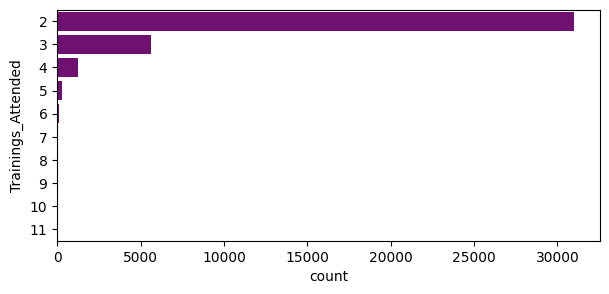

In [ ]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Trainings_Attended", data=promotionData, color="purple")

 30,000 of the staff attended training twice, with the majority of those who got promoted falling into this category. However, those who attended more than 9 to 11 training sessions never got promoted due to their poor performance

In [ ]:
Trainings_Attended = promotionData[(promotionData['Targets_met'] == 0) & (promotionData['Trainings_Attended'] >= 10) & (promotionData['Promoted_or_Not'] ==0)]
Trainings_Attended = Trainings_Attended[['EmployeeNo', 'Division', 'Channel_of_Recruitment', 'Trainings_Attended','Last_performance_score','Targets_met','Training_score_average','Promoted_or_Not']]
Trainings_Attended

,EmployeeNo,Division,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Training_score_average,Promoted_or_Not
4408,YAK/S/06208,Sourcing and Purchasing,Agency and others,11,7.5,0,62,0
9382,YAK/S/13313,Commercial Sales and Marketing,Direct Internal process,10,0.0,0,44,0
14025,YAK/S/19961,Sourcing and Purchasing,Direct Internal process,10,0.0,0,60,0
20580,YAK/S/29373,Sourcing and Purchasing,Direct Internal process,10,5.0,0,63,0
21678,YAK/S/30937,Sourcing and Purchasing,Direct Internal process,11,7.5,0,63,0
23029,YAK/S/32871,Sourcing and Purchasing,Direct Internal process,11,2.5,0,58,0
31449,YAK/S/44898,Commercial Sales and Marketing,Agency and others,11,7.5,0,41,0
36920,YAK/S/52766,Sourcing and Purchasing,Direct Internal process,10,7.5,0,67,0
37991,YAK/S/54339,Sourcing and Purchasing,Direct Internal process,10,7.5,0,65,0


 Training seems ineffective because all staff who attended training more than 10 times scored below 8 points in performance, failed to meet targets, and were not promoted. Conversely, some staff performed exceptionally well in Training_score_average. These anomalies suggest that these staff members may struggle to apply the training content to their jobs effectively.


In [ ]:
Targets_met_Not_Promoted = promotionData[(promotionData['Targets_met'] == 1) & (promotionData['Training_score_average'] >= 80) & (promotionData['Promoted_or_Not'] ==0)]
Targets_met_Not_Promoted = Targets_met_Not_Promoted[['EmployeeNo', 'Division', 'Channel_of_Recruitment', 'Trainings_Attended','Last_performance_score','Targets_met','Previous_Award','Training_score_average','Promoted_or_Not']]
Targets_met_Not_Promoted

,EmployeeNo,Division,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
52,YAK/S/00079,Information and Strategy,Agency and others,2,7.5,1,0,83,0
605,YAK/S/00858,Information and Strategy,Direct Internal process,3,0.0,1,0,81,0
721,YAK/S/01012,Information and Strategy,Agency and others,2,10.0,1,0,81,0
722,YAK/S/01014,Information and Strategy,Agency and others,3,7.5,1,0,80,0
826,YAK/S/01156,Information and Strategy,Agency and others,3,12.5,1,0,80,0
...,...,...,...,...,...,...,...,...,...
37840,YAK/S/54109,Information and Strategy,Direct Internal process,2,12.5,1,0,81,0
37970,YAK/S/54311,Information and Strategy,Direct Internal process,2,7.5,1,0,86,0
38178,YAK/S/54614,Research and Innovation,Agency and others,3,7.5,1,0,84,0
38202,YAK/S/54641,Information and Strategy,Agency and others,2,12.5,1,0,81,0



Some staff members achieved high scores in Last_performance_score, above 80 in Training_score_average, and also met targets but were not promoted, particularly within the Information and Strategy division. However, the decision to promote employees could be influenced by various factors, and other columns in the dataset might indirectly affect this decision. The Previous_Award feature seems to be responsible for this observed pattern.

In [ ]:

promotionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [11]:
#encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
promotionData['EmployeeNo'] = label_encoder.fit_transform(promotionData['EmployeeNo'])
promotionData['Division'] = label_encoder.fit_transform(promotionData['Division'])
promotionData['Gender'] = label_encoder.fit_transform(promotionData['Gender'])
promotionData['Qualification'] = label_encoder.fit_transform(promotionData['Qualification'])
promotionData['Channel_of_Recruitment'] = label_encoder.fit_transform(promotionData['Channel_of_Recruitment'])
promotionData['State_Of_Origin'] = label_encoder.fit_transform(promotionData['State_Of_Origin'])
promotionData['Foreign_schooled'] = label_encoder.fit_transform(promotionData['Foreign_schooled'])
promotionData['Marital_Status'] = label_encoder.fit_transform(promotionData['Marital_Status'])
promotionData['Past_Disciplinary_Action'] = label_encoder.fit_transform(promotionData['Past_Disciplinary_Action'])
promotionData['Previous_IntraDepartmental_Movement'] = label_encoder.fit_transform(promotionData['Previous_IntraDepartmental_Movement'])

In [17]:
promotionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  int64  
 1   Division                             38312 non-null  int64  
 2   Qualification                        38312 non-null  int64  
 3   Gender                               38312 non-null  int64  
 4   Channel_of_Recruitment               38312 non-null  int64  
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [12]:
promotionData

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,0,1,1,0,1,2,1986,12.5,2011,1,0,41,3,0,0,0,0,0,0
1,1,2,0,1,0,2,1991,12.5,2015,0,0,52,3,1,0,0,0,0,0
2,2,1,0,1,1,2,1987,7.5,2012,0,0,42,20,1,0,0,0,0,0
3,3,1,0,1,0,3,1982,2.5,2009,0,0,42,26,1,2,0,0,1,0
4,4,4,0,1,1,3,1990,7.5,2012,0,0,77,2,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,38307,3,0,0,1,2,1990,0.0,2018,0,0,70,24,1,0,0,0,0,0
38308,38308,2,1,0,0,2,1984,5.0,2013,0,0,48,16,1,0,0,0,1,0
38309,38309,4,0,1,0,2,1994,12.5,2016,1,0,71,3,0,0,0,0,3,0
38310,38310,1,3,1,1,2,1992,2.5,2017,0,0,37,23,1,0,0,0,1,0


In [13]:
promo= promotionData.corr()
promo

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
EmployeeNo,1.000000,-0.003977,-0.005434,-0.001911,0.008493,0.005726,-0.002986,0.000218,-0.002152,-0.002201,0.000213,-0.000779,-0.015224,0.008620,0.005106,0.005194,-0.002965,-0.006629,0.000763
Division,-0.003977,1.000000,-0.027568,-0.107572,-0.003205,0.022635,-0.016845,0.027623,-0.004005,0.043780,0.004503,0.487098,-0.000955,-0.003430,-0.003077,-0.004048,0.004342,0.000813,0.015582
Qualification,-0.005434,-0.027568,1.000000,0.031038,-0.017728,-0.033817,-0.071562,-0.015171,-0.049314,-0.030586,-0.005230,-0.050654,0.007463,0.004165,0.004886,0.002987,-0.000056,0.003796,-0.006242
Gender,-0.001911,-0.107572,0.031038,1.000000,0.008076,0.084906,0.012095,-0.023586,0.017644,-0.038382,0.001773,-0.024311,-0.002833,0.016073,-0.004198,0.012799,-0.002715,0.004717,-0.010437
Channel_of_Recruitment,0.008493,-0.003205,-0.017728,0.008076,1.000000,-0.011279,0.031744,0.025190,0.019725,0.019151,-0.003005,0.009362,0.001632,-0.002931,-0.007216,-0.003240,-0.003799,0.000612,0.006324
Trainings_Attended,0.005726,0.022635,-0.033817,0.084906,-0.011279,1.000000,0.078710,-0.062042,0.056215,-0.044789,-0.007409,0.041065,0.010643,-0.005108,-0.005751,-0.002260,-0.005871,0.000796,-0.024345
Year_of_birth,-0.002986,-0.016845,-0.071562,0.012095,0.031744,0.078710,1.000000,-0.175572,0.654666,0.025337,0.013627,0.048390,0.000531,-0.001877,-0.004214,-0.000251,0.011412,-0.003117,0.017991
Last_performance_score,0.000218,0.027623,-0.015171,-0.023586,0.025190,-0.062042,-0.175572,1.000000,-0.190333,0.276350,0.026587,0.057836,0.000386,-0.001923,-0.001908,-0.003065,-0.005478,-0.005428,0.119690
Year_of_recruitment,-0.002152,-0.004005,-0.049314,0.017644,0.019725,0.056215,0.654666,-0.190333,1.000000,0.076910,0.041995,0.037477,0.003785,-0.000253,-0.000715,0.003217,0.004988,-0.003550,0.012287
Targets_met,-0.002201,0.043780,-0.030586,-0.038382,0.019151,-0.044789,0.025337,0.276350,0.076910,1.000000,0.092934,0.077201,0.000604,-0.004294,-0.000251,-0.000264,-0.002965,-0.003308,0.224518


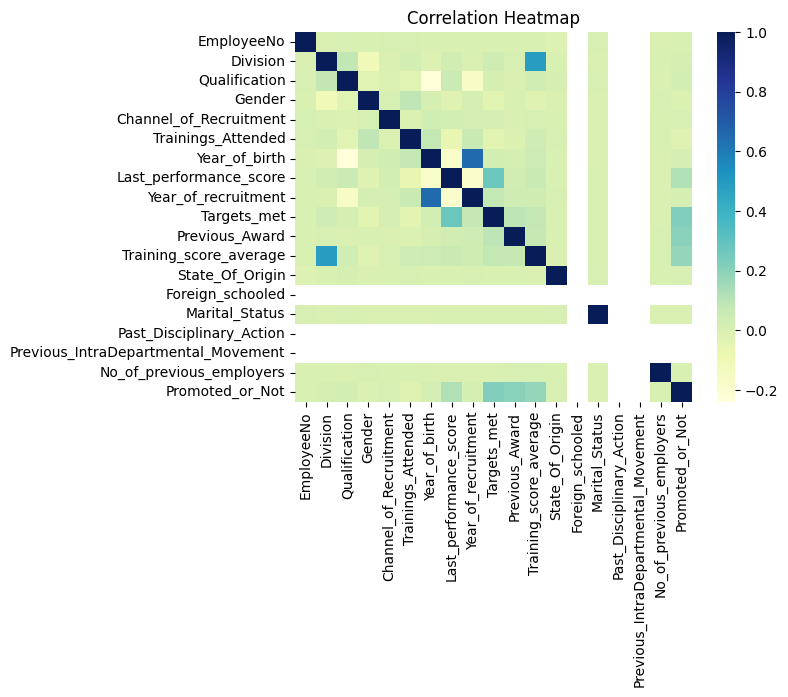

In [27]:
sns.heatmap(promotionData.corr() ,cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

Last_performance_score and Promoted_or_Not: The correlation coefficient (0.119690) indicates a moderate positive correlation between Last_performance_score and Promoted_or_Not, suggesting that higher last performance scores are associated with higher promotion rates.

Year_of_recruitment and Promoted_or_Not: The correlation coefficient (0.012287) indicates a very weak positive correlation between Year_of_recruitment and Promoted_or_Not, suggesting almost no linear relationship between them.

Targets_met and Promoted_or_Not: The correlation coefficient (0.224518) indicates a strong positive correlation between Targets_met and Promoted_or_Not, suggesting that meeting targets is strongly associated with higher promotion rates.

Previous_Award and Promoted_or_Not: The correlation coefficient (0.201434) indicates a strong positive correlation between Previous_Award and Promoted_or_Not, suggesting that receiving previous awards is strongly associated with higher promotion rates.

Training_score_average and Promoted_or_Not: The correlation coefficient (0.178448) indicates a strong positive correlation between Training_score_average and Promoted_or_Not, suggesting that higher training scores are strongly associated with higher promotion rates.


# Obervations:

Gender Distribution: The Yakubu trading group exhibits a gender disparity, with a significantly higher number of male employees (over 25,000) compared to female employees.

Age Distribution: The majority of employees at Yakubu Trading Group fall within the age range of 30 to 40 years, with the oldest employee being 74 years old.

Educational Qualifications: More than 25,000 staff members hold either a first degree or an HND, while approximately 10,000 staff members hold higher qualifications such as MSc, MBA, or PhD.

Relationship Between Qualifications and Age: On average, employees with second degrees and above are 38 years old, while those with only first degrees are below 37 years old.

Recruitment Channels: Over 20,000 staff members were recruited through a third-party agency, while 15,500 employees were hired through direct internal processes.

Promotion Status: A large majority (91.5%) of staff members have not been promoted, while only 8.5% have received promotions.

Target Achievement: 64.7% of staff members did not meet their targets, while 35.3% successfully achieved their targets.

Promotion by Recruitment Channels: Employees who entered through Agency and other channels had the highest number of promoted staff members, followed by those who came in through the Direct Internal Process.

Gender and Target Achievement: A higher proportion of male employees met their targets compared to female employees.

Division-wise Training Scores: Information and Strategy received the highest training scores, followed by Commercial Sales and Marketing and Business Finance Operations.

Division-wise Target Achievement: Customer Support and Field Operations exhibited the highest number of staff members who met their targets, followed by Commercial Sales and Marketing.

Previous Award and Promotion: The Previous Award feature seems to be a significant factor influencing promotions within the Yakubu Trading Group.

Training Effectiveness: Staff who attended training more than 10 times scored below 8 points in performance, failed to meet targets, and were not promoted, indicating potential ineffectiveness of excessive training.

Performance, Training, and Promotion: Some staff members with high scores in last performance and training were not promoted, suggesting other factors influencing promotion decisions.





# Recommendations
Implement strategies to improve gender diversity within the organization through targeted recruitment and inclusion initiatives.

Offer tailored development programs to enhance the skills and competencies of employees, especially in areas where performance and promotion rates are low.

Review the promotion criteria to ensure fairness and transparency, considering factors beyond Previous Award, such as job performance and potential.

Evaluate the effectiveness of training programs and adjust them as necessary to ensure employees can apply the knowledge gained effectively in their roles.

Implement mechanisms to recognize and reward high-performing employees, regardless of their tenure or previous awards.

Set realistic and achievable targets for employees, providing necessary support and resources to help them meet their objectives.

Diversify recruitment channels to attract candidates with varied backgrounds and skill sets, fostering a more inclusive workforce.

Provide clear career paths and advancement opportunities to motivate employees and encourage continuous professional growth.

Establish a feedback mechanism for employees to voice their concerns, suggestions, and ideas for improving organizational processes and policies.

Enhance performance management processes to provide constructive feedback and support for employees to improve their performance and increase their chances of promotion.








# Predictive Analysis Using Machine Learning Model

In [3]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler #sklearn sickit learn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [14]:
promotionData.isnull().sum()

EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
State_Of_Origin                        0
Foreign_schooled                       0
Marital_Status                         0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
dtype: int64

In [15]:
promo['Promoted_or_Not'].sort_values(ascending = False)


Promoted_or_Not                        1.000000
Targets_met                            0.224518
Previous_Award                         0.201434
Training_score_average                 0.178448
Last_performance_score                 0.119690
Year_of_birth                          0.017991
Division                               0.015582
Year_of_recruitment                    0.012287
Channel_of_Recruitment                 0.006324
State_Of_Origin                        0.005488
Past_Disciplinary_Action               0.004830
Foreign_schooled                       0.003202
No_of_previous_employers               0.001690
EmployeeNo                             0.000763
Marital_Status                        -0.003853
Qualification                         -0.006242
Previous_IntraDepartmental_Movement   -0.008289
Gender                                -0.010437
Trainings_Attended                    -0.024345
Name: Promoted_or_Not, dtype: float64

In [18]:
# Drop the 'EmployeeNo' column as it is not useful for modeling
promotionData = promotionData.drop(columns=['EmployeeNo'])

In [19]:
#Separate the array into input and output components
X = promotionData.drop(columns =['Promoted_or_Not'])
y = promotionData.Promoted_or_Not

In [20]:
X

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,1,1,0,1,2,1986,12.5,2011,1,0,41,3,0,0,0,0,0
1,2,0,1,0,2,1991,12.5,2015,0,0,52,3,1,0,0,0,0
2,1,0,1,1,2,1987,7.5,2012,0,0,42,20,1,0,0,0,0
3,1,0,1,0,3,1982,2.5,2009,0,0,42,26,1,2,0,0,1
4,4,0,1,1,3,1990,7.5,2012,0,0,77,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,3,0,0,1,2,1990,0.0,2018,0,0,70,24,1,0,0,0,0
38308,2,1,0,0,2,1984,5.0,2013,0,0,48,16,1,0,0,0,1
38309,4,0,1,0,2,1994,12.5,2016,1,0,71,3,0,0,0,0,3
38310,1,3,1,1,2,1992,2.5,2017,0,0,37,23,1,0,0,0,1


In [21]:
y

0        0
1        0
2        0
3        0
4        0
        ..
38307    0
38308    0
38309    0
38310    0
38311    0
Name: Promoted_or_Not, Length: 38312, dtype: int64

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
X_train

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
35858,1,0,0,1,2,1995,12.5,2016,1,0,39,23,1,0,0,0,0
15175,2,1,0,0,2,1986,5.0,2010,0,0,52,21,0,2,0,0,1
1277,2,1,1,0,2,1987,5.0,2011,0,0,56,13,1,0,0,0,0
27209,5,0,0,1,2,1993,12.5,2016,0,0,38,32,1,0,0,0,1
7880,1,0,1,1,2,1987,10.0,2013,0,0,39,5,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,0,1,0,2,1972,10.0,2017,0,0,53,14,1,0,0,0,0
11284,2,1,0,1,2,1981,10.0,2008,1,0,57,25,1,0,0,0,1
38158,4,1,1,1,2,1988,12.5,2015,1,0,74,26,1,0,0,0,1
860,1,3,0,0,2,1991,2.5,2015,0,0,42,18,1,0,0,1,1


In [24]:
X_test

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
17896,2,0,1,1,2,1987,10.0,2014,0,0,51,14,1,0,0,0,1
23314,2,0,1,0,2,1989,2.5,2013,0,0,52,15,0,0,0,0,0
14740,1,0,1,1,2,1985,10.0,2017,0,0,38,26,1,0,0,0,3
28915,0,0,0,1,2,1994,12.5,2015,1,0,51,27,1,0,0,0,0
23913,4,0,1,0,2,1993,2.5,2015,0,0,73,14,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36351,5,0,0,1,2,1988,12.5,2012,1,0,40,27,1,0,0,0,1
31729,2,0,1,1,2,1994,12.5,2014,1,0,51,32,1,0,0,0,2
34661,3,0,0,1,4,1993,7.5,2016,0,0,75,24,0,0,0,0,1
22282,2,0,1,0,2,1985,7.5,2014,0,0,49,29,1,2,0,0,2


In [25]:
y_train

35858    0
15175    0
1277     0
27209    0
7880     0
        ..
6265     0
11284    0
38158    0
860      0
15795    0
Name: Promoted_or_Not, Length: 30649, dtype: int64

In [26]:
y_test

17896    0
23314    0
14740    0
28915    0
23913    0
        ..
36351    0
31729    1
34661    0
22282    0
17075    0
Name: Promoted_or_Not, Length: 7663, dtype: int64

In [27]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [31]:
# Make predictions and evaluate the model
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg
#log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
#log_reg_report = classification_report(y_test, y_pred_log_reg)

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
# Print the results
acc = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 91.53073208926008


In [34]:
# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [36]:
# Make predictions and evaluate the model
y_pred_log_reg = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

In [37]:
# Print the results
acc = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 91.54378180869112


# Using Gradient Boosting Classifier model

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [39]:
# Initialize and train the Gradient Boosting Classifier model
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [40]:
# Make predictions and evaluate the model
y_pred_gb_clf = gb_clf.predict(X_test_scaled)
gb_clf_accuracy = accuracy_score(y_test, y_pred_gb_clf)
gb_clf_report = classification_report(y_test, y_pred_gb_clf)

In [41]:
# Print the results
print("Gradient Boosting Classifier Model")
print(f"Accuracy: {gb_clf_accuracy}")
print("Classification Report:")

Gradient Boosting Classifier Model
Accuracy: 0.9343599112619079
Classification Report:


# Using Decision Tree classifier Model

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [43]:
# Initialize and train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.892339814693984

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      6996
           1       0.39      0.40      0.39       667

    accuracy                           0.89      7663
   macro avg       0.66      0.67      0.67      7663
weighted avg       0.89      0.89      0.89      7663

